In [48]:
import pandas as pd
import matplotlib.pyplot as plt
db = pd.read_csv("jumia_reviews.csv", encoding='ISO-8859-1')
db

,Customer Name,Review Topic,Review Body,Rating(of 5),Review date
0,damola,I like it,It develops some little technical issues over ...,4,28-12-2022
1,SHIMA,Earbud,The beat is awesome,5,28-12-2022
2,ul,Awesome stuff,Been using for over two months now. And it's b...,5,27-12-2022
3,anuel,oraimo freepods-3 2baba earpod,The sound is cool,5,27-12-2022
4,ac,I love it.,It is a really good product. Great value for m...,5,23-12-2022
...,...,...,...,...,...
2013,ngsky1,I like it,"I really love this freepod 3, it's a total upg...",5,06-10-2021
2014,il,perfect,Battery life and sound quality is out of this ...,5,06-10-2021
2015,oma,Oraimo????,"The freepods 3 delivery was fast, good packagi...",5,06-10-2021
2016,bami Okelola,Great product,Its really dope i love it its strong and qua...,5,06-10-2021


In [49]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018 entries, 0 to 2017
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer Name  1948 non-null   object
 1   Review Topic   2017 non-null   object
 2   Review Body    2017 non-null   object
 3   Rating(of 5)   2018 non-null   int64 
 4   Review date    2018 non-null   object
dtypes: int64(1), object(4)
memory usage: 79.0+ KB


In [50]:
db_reviews =  db[["Review Body","Rating(of 5)","Review date"]]
db_reviews 

,Review Body,Rating(of 5),Review date
0,It develops some little technical issues over ...,4,28-12-2022
1,The beat is awesome,5,28-12-2022
2,Been using for over two months now. And it's b...,5,27-12-2022
3,The sound is cool,5,27-12-2022
4,It is a really good product. Great value for m...,5,23-12-2022
...,...,...,...
2013,"I really love this freepod 3, it's a total upg...",5,06-10-2021
2014,Battery life and sound quality is out of this ...,5,06-10-2021
2015,"The freepods 3 delivery was fast, good packagi...",5,06-10-2021
2016,Its really dope i love it its strong and qua...,5,06-10-2021


In [51]:
db_reviews.isnull()


,Review Body,Rating(of 5),Review date
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2013,False,False,False
2014,False,False,False
2015,False,False,False
2016,False,False,False


In [52]:
db_reviews_nonull = db_reviews.dropna()
db_reviews_nonull

,Review Body,Rating(of 5),Review date
0,It develops some little technical issues over ...,4,28-12-2022
1,The beat is awesome,5,28-12-2022
2,Been using for over two months now. And it's b...,5,27-12-2022
3,The sound is cool,5,27-12-2022
4,It is a really good product. Great value for m...,5,23-12-2022
...,...,...,...
2013,"I really love this freepod 3, it's a total upg...",5,06-10-2021
2014,Battery life and sound quality is out of this ...,5,06-10-2021
2015,"The freepods 3 delivery was fast, good packagi...",5,06-10-2021
2016,Its really dope i love it its strong and qua...,5,06-10-2021


In [53]:
db_reviews_nonull.drop_duplicates(subset=["Review Body","Review date"])

,Review Body,Rating(of 5),Review date
0,It develops some little technical issues over ...,4,28-12-2022
1,The beat is awesome,5,28-12-2022
2,Been using for over two months now. And it's b...,5,27-12-2022
3,The sound is cool,5,27-12-2022
4,It is a really good product. Great value for m...,5,23-12-2022
...,...,...,...
2013,"I really love this freepod 3, it's a total upg...",5,06-10-2021
2014,Battery life and sound quality is out of this ...,5,06-10-2021
2015,"The freepods 3 delivery was fast, good packagi...",5,06-10-2021
2016,Its really dope i love it its strong and qua...,5,06-10-2021


In [54]:
db_reviews_nonull


,Review Body,Rating(of 5),Review date
0,It develops some little technical issues over ...,4,28-12-2022
1,The beat is awesome,5,28-12-2022
2,Been using for over two months now. And it's b...,5,27-12-2022
3,The sound is cool,5,27-12-2022
4,It is a really good product. Great value for m...,5,23-12-2022
...,...,...,...
2013,"I really love this freepod 3, it's a total upg...",5,06-10-2021
2014,Battery life and sound quality is out of this ...,5,06-10-2021
2015,"The freepods 3 delivery was fast, good packagi...",5,06-10-2021
2016,Its really dope i love it its strong and qua...,5,06-10-2021


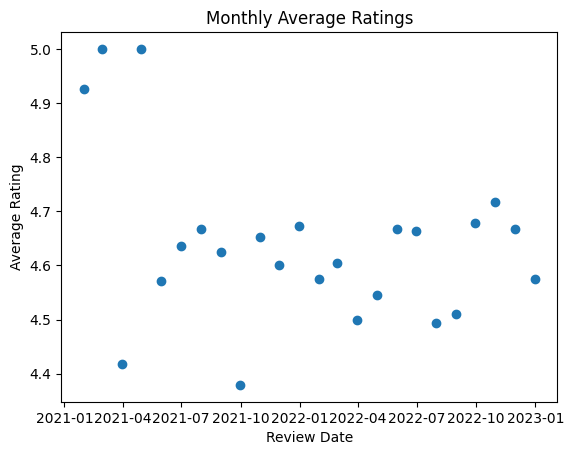

In [56]:
# Convert the review_date column to a datetime format
db_reviews_nonull['Review date'] = pd.to_datetime(db_reviews_nonull['Review date'])

# Group the data by month and calculate the mean rating for each month
monthly_ratings = db_reviews_nonull.groupby(pd.Grouper(key='Review date', freq='M'))['Rating(of 5)'].mean().reset_index()

# Create a scatter plot of monthly ratings
plt.scatter(monthly_ratings['Review date'], monthly_ratings['Rating(of 5)'])
plt.xlabel('Review Date')
plt.ylabel('Average Rating')
plt.title('Monthly Average Ratings')
plt.show()

In [57]:
monthly_ratings.mean()

Rating(of 5)    4.639354
dtype: float64

In [66]:
db_reviews["positive_reviews"] = db_reviews[db_reviews["Rating(of 5)"]>=4]["Review Body"]
print(db_reviews["positive_reviews"])

0       It develops some little technical issues over ...
1                                     The beat is awesome
2       Been using for over two months now. And it's b...
3                                       The sound is cool
4       It is a really good product. Great value for m...
                              ...                        
2013    I really love this freepod 3, it's a total upg...
2014    Battery life and sound quality is out of this ...
2015    The freepods 3 delivery was fast, good packagi...
2016    Its really dope i love it its strong and qua...
2017    Get it! I transitioned from the freepods 2 to ...
Name: positive_reviews, Length: 2018, dtype: object


In [68]:
db_reviews["nagative_reviews"] = db_reviews[db_reviews["Rating(of 5)"]<4]["Review Body"]
print(db_reviews["nagative_reviews"])

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
2013    NaN
2014    NaN
2015    NaN
2016    NaN
2017    NaN
Name: nagative_reviews, Length: 2018, dtype: object


In [72]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to calculate the sentiment score for each review
def get_sentiment_score(review):
    sentiment = sia.polarity_scores(review)
    return sentiment['compound']

# Apply the sentiment analyzer to the review_body column to calculate the sentiment score for each review
db_reviews_nonull['sentiment_score'] = db_reviews_nonull['Review Body'].apply(get_sentiment_score)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/repl/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [73]:
db_reviews_nonull["sentiment_score"].mean()

0.4482982151710461

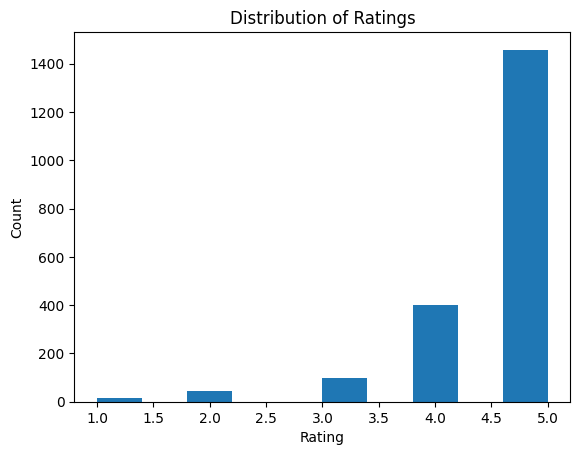

In [74]:
plt.hist(db_reviews_nonull['Rating(of 5)'])
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()